** References:   **   
** 1. Thomas Haslwanter, An Introduction to Statistics with Python, 2016 **   
** 2. https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html **    
** 3. 冈和幸/堀玄, 程序员的数学2-概率统计，2015 **    
** 4. 统计学基本概念入门，网易云课堂 **

### 统计学基本概念 ###

#### 个体、变量和差异

**个体**：是统计分析根据研究母的所确定的最基本的研究对象单位  
**变量**：根据研究目的确定研究对象，然后对研究对象的某项目或指标进行观察或测量，这种研究项目或指标成为变量  
*变量类型*：
 - 连续变量：取值范围是一个区间，它可以在改区间中连续取值，一些特殊的变量并不能取到任意值，但仍然按连续变量处理（比如年龄）
 - 离散变量：取值范围是有限个值或者一个数列构成，表示分类情况的离散型变量又称为分类离散变量。根据类别的有序性，分类变量又分为有序分类和无序分类（比如二分类）。
 - 连续变量、有序变量、无序变量间的信息越来越少，在丢弃一部分信息量的前提下，可以将变量向信息量减少的方向变化  

**变异**：同质个体的某指标（变量）值的差异



#### 总体、样本与随机抽样

**总体**：population，是根据研究目的确定的同质所有个体某指标观察值（测量值）的集合。可以分为有限总体和无限总体。  

**样本**：从一个较大范围的研究对象中抽出的供观察（测量）的部分个体。  

**随机抽样**：在抽样研究中，随机抽出部分进行观察或测量的过程。每个个体最终是否入选在抽样进行前是不可知的，但是其入选可能性是确切可知的。  

#### 统计量、总体参数与抽样误差

**统计量**：statistic，刻画样本特征的统计指标。  

**总体参数**：parameter，刻画总体特征的指标，例如总体中某个指标的所有个体变量值的平均数成为总体平均数。  

**抽样误差**：sampling error，由随机抽样造成的样本统计量与总体指标的差异。 

**抽样分布**：虽然在一次抽样研究中的抽样误差大小随机，但是抽样误差在概率意义下有律可循，这种规律成为抽样分布。  

#### 概率、频率和小概率事件

**随机事件**：随机现象的某个可能的观察结果。  

**频率**：观察到的随机事件某个结局的出现频次或比例，可以被直接观察到。  

**概率**：刻画随机事件发生可能性的大小，取值介于0和1之间。它不能被直接观察到，但可以通过频率估计，实验次数越多，估计越精确。  

**小概率事件**：如果随机事件发生的概率小于等于0.05，则认为是一个小概率事件。   

** Note **

** 概率是一种面积，矩阵是一种映射 **  

*Monty Hall问题*  
参赛者会看见三扇关闭了的门，其中一扇的后面有一辆汽车或者是奖品，选中后面有车的那扇门就可以赢得该汽车或奖品，而另外两扇门后面则各藏有一只山羊或者是后面没有任何东西。当参赛者选定了一扇门，但未去开启它的时候，知道门后情形的节目主持人会开启剩下两扇门的其中一扇，露出其中一只山羊。主持人其后会问参赛者要不要换另一扇仍然关上的门。问题是：换另一扇门会否增加参赛者赢得汽车的机会率？

In [2]:
import random

class monty_hall:
    # 初始化变量
    def __init__(self):
        self.car_door = None
        self.opened_door = None
        self.selected_door = None
    
    # 用户随机选择一个门
    def select_door(self):
        self.selected_door = random.randint(1,3)

    # 主持人选择打开的门
    def open_door(self):
        self.opened_door = random.randint(1,3)
        while (self.opened_door ==  self.selected_door) or (self.opened_door ==  self.car_door):
            self.opened_door = random.randint(1,3)
    
    # 用户转换选择
    def change_door(self):
        self.selected_door = 6 - self.opened_door - self.selected_door
    
    # 判断用户选择的门后是否有汽车
    def is_win(self):
        if self.selected_door == self.car_door:
            return True
        else:
            return False
    
    def run(self, change_flag=True):
        self.car_door = random.randint(1,3)
        self.select_door()
        self.open_door()
        if change_flag:
            self.change_door()
        
        return self.is_win()
    
win_num, lose_num = 0, 0
total_num = 10000
mh = monty_hall()

for i in range(total_num):
    if mh.run(change_flag=True):
        win_num += 1
    else:
        lose_num += 1

print("win rate is:", win_num/total_num)

win rate is: 0.6697


#### 统计研究步骤

**设计**：
选题->明确研究目的->提出假设->明确总体范围->确定观察目标->控制研究中的偏倚->给出具体的研究方案  

**收集**：  
质量控制极其重要，garbage in, garbage out  

**整理**：  
越来越倾向于半自动化

**分析**：   
**统计描述**：尽量精确、直观而全面的对获得的样本进行呈现，比如使用统计图、统计报表。  
**统计推断**：从样本信息外推到总体，以最终获得对所感兴趣问题的解答。   
- 参数估计：样本->总体特征   
- 假设检验：指标可能的影响因素分析   

### 连续随机变量的统计描述

#### 均数

**优点**：  
- 使大量观测数据转换为一个代表性数值
- 直观便于理解传播

**缺点**：   
- 掩盖了各个观测数据之间的差异性  
- 对个别极端值反应比较灵敏  

**使用范围**：  
- 对称分布，特别是正态分布

In [13]:
import numpy as np

x = [10, 20, 30, 20, 5000]
print(np.mean(x))

xWithNan = np.r_[x, np.nan]
print(np.mean(xWithNan))
print(np.nanmean(xWithNan))

a = 3
y1 = a * x
print(y1)
print(np.mean(y1))

y2 = np.array(a) * x
print(y2)
print(np.mean(y2))

z = np.array(x) + 4
print(np.mean(z))

1016.0
nan
1016.0
[10, 20, 30, 20, 5000, 10, 20, 30, 20, 5000, 10, 20, 30, 20, 5000]
1016.0
[   30    60    90    60 15000]
3048.0
1020.0


#### 中位数

中位数：将全体数据按大小顺序排列，在这个数列中处于中间位置的那个值。  

**优点**：  
- 它是位置平均数，不受极端值的影响。在具有个别极端值的数列中，中位数比算数平均数更具代表性。

**缺点**：    
- 相对均数难以理解
- 当样本数比较小的时候，中位数不稳定

In [15]:
x = [10, 20, 30, 20, 5000]

print(np.median(x))

20.0


#### 其他

**几何均数**：  
- 对各变量值的连乘积开项数次方根
- 适用于具有等比或近似等比关系的数据

**众数**：   
- 是一组数据中出现次数最多的数值
- 对非数值统计比较有用，由于非数值数据无法良好定义算术平均数和中位数

**截尾均数**：  
- 数据进行行排序后，按照一定比例去掉最两端的数据，只使用中部的数据来计算出得均数

In [27]:
from scipy import stats

x = [10, 20, 30, 20, 30, 40, 5000]

print(stats.mode(x))

import pandas as pd

print(pd.Series(x).mode())

import warnings
warnings.filterwarnings('ignore')

print(stats.trim_mean(x, 0.25))
print(stats.trim_mean(x, 0.05))

ModeResult(mode=array([20]), count=array([2]))
0    20
1    30
dtype: int64
28.0
735.7142857142857


#### 全距

全距：序列中最大值与最小值之间的差距

In [29]:
x = [10, 20, 30, 20, 30, 40, 5000]

# ptp stands for “peak-to-peak.”
print(np.ptp(x))

4990


#### 方差和标准差

**离均差**：
个体对群体平均值的距离

**方差**：  
每个样本值与样本值的平均数之差的平方值的平均数（无偏估计）：   
$\sigma ^ { 2 } = \sum ( X - \mu ) ^ { 2 } / n$   
实际工作中，总体均数难以得到时，应用样本统计量代替总体参数，经校正后，样本方差计算公式（有偏估计）：   
$s ^ { 2 } = \frac { 1 } { n - 1 } \sum _ { i = 1 } ^ { n } ( X - \overline { X } ) ^ { 2 }$

**标准差**：
又常称均方差（无偏估计），是离均差平方的算术平均数的平方根：  
$\sigma = \sqrt { \sum ( X - \mu ) ^ { 2 } / n }$   
实际工作中，总体均数难以得到时，应用样本统计量代替总体参数，经校正后，样本标准差计算公式（有偏估计）：    
$S = \sqrt { \sum ( X - \overline { X } ) ^ { 2 } / ( n - 1 ) }$   

**变异系数**：   
原始数据标准差与原始数据平均数的比，它消除测量尺度和量纲的影响：   
$c _ { v } = { \sigma } / { \mu }$   

方差-标准差-变异系数适用于对称分布，本质上只适用于正态分布的数据。

In [34]:
x = [10, 20, 30, 20, 30, 40, 5000]

print(np.var(x))
print(np.std(x))
# ddof : 自由度。The divisor used in calculations is N - ddof, where N represents the number of elements. By default ddof is zero.
print(np.std(x, ddof=0))
print(np.std(x, ddof=1))
print(np.std(x)/np.mean(x))

3030767.3469387754
1740.9099192487747
1740.9099192487747
1880.3976276562462
2.366285327134257


#### 百分位数

**百分位数**：
如果将一组数据从小到大排序，并计算相应的累计百分位，则某一百分位所对应数据的值就称为这一百分位的百分位数。它适用于各种分布。   

**四分位数**：
把所有数值由小到大排列并分成四等份，处于三个分割点位置的数值：P25，P50，P75。   

In [38]:
x = [10, 20, 30, 20, 30, 40, 5000]

print(np.percentile(x, [0, 25, 50, 75, 95]))

[  10.   20.   30.   35. 3512.]


#### 分布

**偏度(skewness)系数**：描述分布偏离对称性程度的一个特征数。当分布左右对称时，偏度系数为0。当偏度系数大于0时，即重尾在右侧时，该分布为右偏。当偏度系数小于0时，即重尾在左侧时，该分布左偏。   
**峰度(kurtosis)系数**：描述概率密度分布曲线在平均值处峰值高低的特征数。

### 分类变量的统计描述

#### 基本的描述方式

- 频数列表  
- 百分比  
- 累计频数  
- 累计百分比  
- 众数  

In [57]:
x = [10, 20, 30, 20, 30, 40, 5000]

unique_elements, counts_elements = np.unique(x, return_counts=True)
for u, c in zip(unique_elements, counts_elements):
    print(u, c, c/sum(counts_elements))
    
print(np.cumsum(counts_elements))
print(np.cumsum(counts_elements)/sum(counts_elements))
print(pd.Series(x).mode())

10 1 0.14285714285714285
20 2 0.2857142857142857
30 2 0.2857142857142857
40 1 0.14285714285714285
5000 1 0.14285714285714285
[1 3 5 6 7]
[0.14285714 0.42857143 0.71428571 0.85714286 1.        ]
0    20
1    30
dtype: int64


#### 比（ratio）和率（rate）

**比（ratio）**：任意两个变量之比，这两个变量可以是性质相同的也可以是性质不同的，一般这两个变量的比值必须有专业意义。   
**构成比（proportion）**：部分占总体的比例，各部分构成比之和为1。   
**率（rate）**：某个时期内某个事件发生的频率或强度，比如发病率，成功率。

In [60]:
x = [10, 20, 30, 20, 30, 40, 5000]
y = [15, 30, 50, 20, 40, 100, 6000]

print(np.array(x)/np.array(y))

[0.66666667 0.66666667 0.6        1.         0.75       0.4
 0.83333333]


In [9]:
print(np.std(data, ddof=1)/np.sqrt(len(data)))
print(stats.sem(data))

0.816496580928
0.816496580928


### 正态分布

#### 概率即面积

**概率密度函数（probability density function）**：连续型随机变量的概率密度函数（在不至于混淆时可以简称为密度函数）是一个描述这个随机变量的输出值，在某个确定的取值点附近的可能性的函数。本身不是概率，取值积分后才是概率。    

**累计概率**：概率密度曲线下的面积。   

**概率质量函数（probability mass function)**：概率质量函数是离散随机变量在各特定取值上的概率。   

- PDF是连续变量特有的，PMF是离散随机变量特有的；
- PDF的取值本身不是概率，它是一种趋势（密度）只有对连续随机变量的取值进行积分后才是概率，也就是说对于连续值确定它在某一点的概率是没有意义的；
- PMF的取值本身代表该值的概率。

** 其他相关函数 **    
- **Probability density function (PDF)**:    
Note that to obtain the probability for the variable appearing in a certain interval, you have to integrate the PDF over that range.    
Example: What is the chance that a man is between 160 and 165 cm tall?      

- **Cumulative distribution function (CDF)**:    
Gives the probability of obtaining a value smaller than the given value.    
Example: What is the chance that a man is less than 165 cm tall?    

- **Survival Function SF = 1-CDF**:    
Gives the probability of obtaining a value larger than the given value. It can also be interpreted as the proportion of data “surviving” above a certain value.    
Example: What is the chance that a man is larger than 165 cm?    

- **Percentile Point Function (PPF)**:    
The inverse of the CDF. The PPF answers the question “Given a certain probability, what is the corresponding input value for the CDF?”      
Example: Given that I am looking for a man who is smaller than 95% of all other men, what size does the subject have to be?     

- **Inverse Survival Function (ISF)**:    
The name says it all.      
Example: Given that I am looking for a man who is larger than 95% of all other
men, what size does the subject have to be?    

- **Random Variate Sample (RVS)**:     
Random variates from a given distribution. (A variable is the general type, a variate is a specific number.)



0.9750021048517795
0.024997895148220435
1.959963984540054
-1.959963984540054
0.024997895148220435
0.9750021048517795
-1.9599639845400545
1.9599639845400545


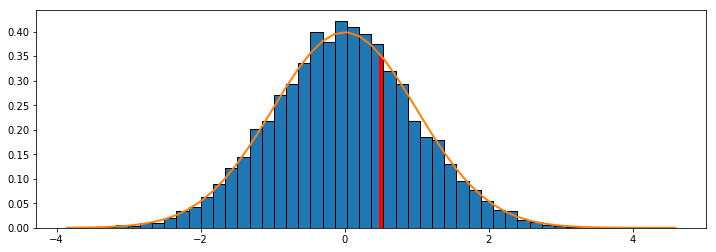

In [84]:
rv = stats.norm(0,1)

y = stats.norm.rvs(0, 1, 10000)
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(111)
n, bins, ignored = ax.hist(y, 50, normed=True, edgecolor='k')
ax.plot(bins, 1/(np.sqrt(2*np.pi))*np.exp(-(bins)**2/(2)), lw=2.0);
plt.vlines(0.5, 0, rv.pdf(0.5), colors='red', lw=4.0);

print(rv.cdf(1.96))
print(rv.sf(1.96))
print(rv.ppf(0.975))
print(rv.isf(0.975))

print(rv.cdf(-1.96))
print(rv.sf(-1.96))
print(rv.ppf(0.025))
print(rv.isf(0.025))

#### 正态分布

**正态分布**：   
- 记为$X \sim N \left( \mu , \sigma ^ { 2 } \right)$
- 概率密度函数：$f ( x ) = \frac { 1 } { \sigma \sqrt { 2 \pi } } e ^ { - \frac { ( x - \mu ) ^ { 2 } } { 2 \sigma ^ { 2 } } }$
- $\mu$是分布缺陷的峰位置，又称为位置参数   
- $\sigma$越大离散程度越大，又称为形状参数   

**标准正态分布**   
均值为0，标准差为1的正态分布N(0,1)。   
- 如果$X \sim N \left( \mu , \sigma ^ { 2 } \right)$，则$y = \frac { X - \mu } { \sigma } \sim N ( 0,1 )$


5.0 3.0 9.0


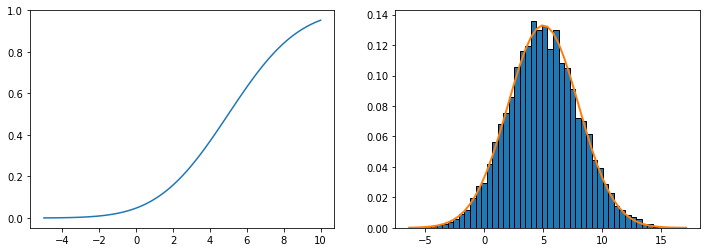

In [62]:
n_d = stats.norm(5,3)
print(n_d.mean(), n_d.std(), n_d.var())
x = np.linspace(-5, 10, 101)
y = n_d.cdf(x)

import matplotlib.pyplot as plt
% matplotlib inline

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax1.plot(x, y);

ax2 = fig.add_subplot(122)
fx = stats.norm.rvs(5, 3, 10000)
# edgecolor指定bin的边框： https://stackoverflow.com/questions/43080259/no-outlines-on-bins-of-matplotlib-histograms-or-seaborn-distplots
# bins返回的是x轴bin的坐标列表
n, bins, ignored = ax2.hist(fx, 50, normed=True, edgecolor='k')
ax2.plot(bins, 1/(3*np.sqrt(2*np.pi))*np.exp(-(bins-5)**2/(2*3**2)), lw=2.0);

### 二项分布

**伯努利试验**：是在**同样的条件下**重复地、**相互独立地**进行的一种随机试验，其特点是该随机试验只有两种可能结果：发生或者不发生。单个伯努利试验是没有多大意义的，然而，当我们反复进行伯努利试验，去观察这些试验有多少是成功的，多少是失败的，事情就变得有意义了。   

**二项分布**：是指n个独立的是/非试验中成功的次数的离散概率分布，其中每次试验的成功概率为p。当n=1时，二项分布就是伯努利分布。   
- 二项分布是离散分布   
- 概率分布：$b ( x , n , p ) = C _ { n } ^ { x } p ^ { x } q ^ { n - x }$，b表示二项分布的概率，n表示试验次数，x表示出现某个结果的次数，p是事件出现的概率。   
- 均值为np，方差为np(1-p)

0.7
0.3
[0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1
 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
6.0
4.199999999999999


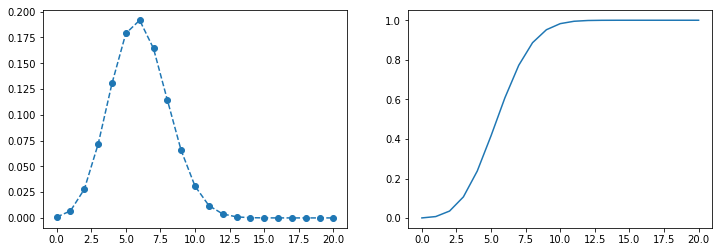

In [96]:
# 伯努利试验
p = 0.3
bernoulli_dist = stats.bernoulli(p)
print(bernoulli_dist.pmf(0))
print(bernoulli_dist.pmf(1))
print(bernoulli_dist.rvs(100))


## 二项分布
p, num = 0.3, 20
binomal_dist = stats.binom(num, p)
binomal_pmf = binomal_dist.pmf(np.arange(0, num+1))
binomal_cdf = binomal_dist.cdf(np.arange(0, num+1))

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax1.plot(binomal_pmf, ls='--', marker='o')
ax2 = fig.add_subplot(122)
ax2.plot(binomal_cdf);

print(binomal_dist.mean())
print(binomal_dist.var())

#### Confidence Intervals
The $\alpha$% confidence interval (CI) reports the range that contains
the true value for the parameter with a likelihood of $\alpha$%

#### Location
A location parameter x0 determines the location or shift of a distribution:   
 $$f_{x0}(x)=f(x-x0)$$

#### Scale
The scale parameter describes the width of a probability distribution:   
$$f_s(x)=f(x/s)/s$$
where f is the density of a standardized version of the density.

** 大数定律 **      

独立同分布：    
如果随机变量满足（1）每一个随机变量对应的分布都相同；（2）任意随机变量都相互独立，    
则称随机变量服从独立同分布。   

平均值得期望值与平均值的方差：   
对于随机变量$X_1,X_2,...,X_n$,它们的平均值Z定义如下：
$$Z = \frac{X_1+X_2+...+X_n}{n}$$
由于$X_1,X_2,...,X_n$都是随机值，因此由它们计算得到的Z也是一个随机值。并且有以下结论：   
- 恒定值的平均值仍然是恒定值   
- 随机值的平均值仍然是随机值   

大数定律：   
对于服从独立同分布的随机变量$X_1,X_2,...,X_n$,它们的平均值Z定义如下，
$$Z_n = \frac{X_1+X_2+...+X_n}{n}$$
Z的期望值和方差为：   
$$E[Z_n] = \mu$$
$$V[Z_n] = \frac{\sigma^2}{n}$$

### Discrete Distributions

#### Bernoulli Distribution

伯努利分布：假设成功的概率为p，失败的概率为1−p

In [26]:
p = 0.3
bernoulli_dist = stats.bernoulli(p)
print(bernoulli_dist.pmf(0))
print(bernoulli_dist.pmf(1))
print(bernoulli_dist.rvs(100))

0.7
0.3
[1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0
 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0]


#### Binomial Distribution   
Out of a given (fixed) number of trials, how many will succeed?   
如果试验是一个n重伯努利试验，每次伯努利试验的成功概率为p，X代表成功的次数，则X的概率分布是二项分布

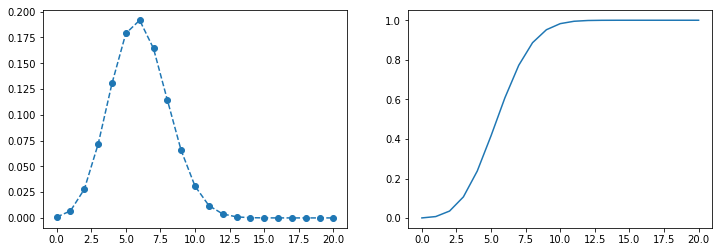

In [12]:
p, num = 0.3, 20
binomal_dist = stats.binom(num, p)
binomal_pmf = binomal_dist.pmf(np.arange(0, num+1))
binomal_cdf = binomal_dist.cdf(np.arange(0, num+1))

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax1.plot(binomal_pmf, ls='--', marker='o')
ax2 = fig.add_subplot(122)
ax2.plot(binomal_cdf);

In [13]:
# P值（P value）就是当原假设为真时所得到的样本观察结果或更极端结果出现的概率。
# 如果P值很小，说明原假设情况的发生的概率很小，而如果出现了，根据小概率原理，我们就有理由拒绝原假设，P值越小，我们拒绝原假设的理由越充分。
# scipy.stats.binom_test(x, n=None, p=0.5, alternative=’two-sided’): Perform a test that the probability of success is p.
print(stats.binom_test(300, 1000, p=0.3))
print(stats.binom_test(320, 1000, p=0.3))

1.0
0.167663073279


#### Poisson Distribution   
Poisson distribution measures how many times a discrete event occurs, over a period of continuous space or time.

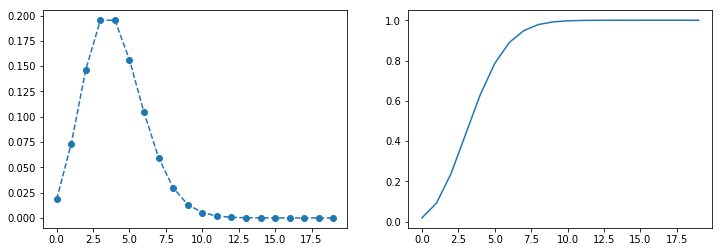

In [14]:
lam = 4
poisson_dist = stats.poisson(lam)
poisson_pmf = poisson_dist.pmf(np.arange(0, 20))
poisson_cdf = poisson_dist.cdf(np.arange(0, 20))

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax1.plot(poisson_pmf, ls='--', marker='o')
ax2 = fig.add_subplot(122)
ax2.plot(poisson_cdf);

** 模拟 **    
设结果为“甲”的出现概率为0.7，结果为“乙”的出现概率为0.3.且无论选择甲还是乙，只要猜中，技能获得双倍下注金额。假设你每天都会投入所有资产参与这场赌博。具体来说，你会将占总资产比例为p的金额投给甲，再将剩余的投给乙。这里p是一个事先确定的值。

In [59]:
px = 0.7
bernoulli_dist = stats.bernoulli(px)
x = bernoulli_dist.rvs(100)
print(x)
asset = 100
assets = []
p = 0.7
for i in range(100):
    if x[i]:
        asset = asset*2*p
    else:
        asset = asset*2*(1-p)
    assets.append(asset)

print(assets)

[0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0
 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1]
[60.00000000000001, 36.00000000000001, 50.400000000000006, 30.24000000000001, 42.33600000000001, 59.270400000000016, 35.56224000000002, 21.337344000000012, 29.872281600000015, 41.82119424000002, 25.092716544000016, 35.12980316160002, 21.077881896960015, 12.646729138176012, 7.588037482905608, 10.62325247606785, 14.87255346649499, 20.821574853092987, 29.15020479433018, 40.81028671206225, 57.13440139688715, 79.988161955642, 47.99289717338521, 67.19005604273929, 40.314033625643575, 56.439647075901, 33.863788245540604, 20.318272947324367, 28.445582126254113, 39.823814976755756, 23.894288986053457, 33.452004580474835, 46.832806412664766, 28.099683847598865, 16.85981030855932, 10.115886185135594, 6.069531711081357, 8.497344395513899, 5.09840663730834, 3.0590439823850044, 4.282661575339006, 5.

### Continuous Distributions

** 累计分布函数 **   
$$ F_X(a)=P(X<=a) $$   
$$ P({a}\leq{X}\leq{b})= \int_a^bf_X(x)dx$$
$$ P({-\infty}\leq{X}\leq{\infty})= \int_{-\infty}^{\infty}f_X(x)dx=1 $$
$$ P(X=a) = \int_{a}^{a}f_X(x)dx=0 $$
$$ f_Y(y) = |\frac{f_X(x)}{g^{'}(x)}|, 其中y=g(x) $$

** 概率分布函数 **   
$$ f_X(x)=F^{'}_X(x)=\frac{dF_X(x)}{dx} $$   

** 联合分布 **    
假设有实数值随机变量X与Y，由它们组成的二元向量W=(X,Y)的概率分布成为X,Y的联合分布。   
- 联合概率密度函数$f_{X,Y}(x,y)\geq{0}$    
- $$ P({a}\leq{X}\leq{b}且{c}\leq{Y}\leq{d})= \int_{c}^{d}{\LARGE(}\int_{a}^{b}f_{X,Y}(x,y)dx{\LARGE)}dy= \int_{a}^{b}{\LARGE(}\int_{c}^{d}f_{X,Y}(x,y)dy{\LARGE)}dx $$ $$ ({a}\leq{b},{c}\leq{d})$$

#### 均匀分布 ####    

- 区间内任意值得概率密度恒定   
- 不会出现区间范围之外的值    
- 均匀分布在做非线性变量变换之后得到的结果不再是均匀分布，也可以说，可以通过变换均匀分布来得到各种所需的分布

#### t-Distribution
t分布就是正态总体的均值在未知方差时的分布

In [17]:
n = 20
# df: 自由度
df = n - 1
alpha = 0.05

print(stats.t(df).isf(alpha/2))
print(stats.norm.isf(alpha/2))

2.09302405441
1.95996398454
